In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import TargetEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (15509, 10)


In [5]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
print("\nDataset Information:\n")
df.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [7]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Year       Rating
count  14981.000000  7919.000000
mean   -1987.012215     5.841621
std       25.416689     1.381777
min    -2022.000000     1.100000
25%    -2009.000000     4.900000
50%    -1991.000000     6.000000
75%    -1968.000000     6.800000
max    -1913.000000    10.000000


In [8]:
# Checking for duplicated
df.duplicated().sum()

6

In [9]:
# Dropping duplicated values
df.drop_duplicates(inplace=True)

In [10]:
# Checking for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [11]:
# Filling Null Values for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [12]:
# Filling Null Values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
# Checking for missing values again
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [14]:
# Checking Unique values of all columns
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'Name':
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']


Unique values in column 'Year':
[-1991. -2019. -2021. -2010. -1997. -2005. -2008. -2012. -2014. -2004.
 -2016. -1990. -2018. -1987. -1948. -1958. -2017. -2020. -2009. -2002.
 -1993. -1946. -1994. -2007. -2013. -2003. -1998. -1979. -1951. -1956.
 -1974. -2015. -2006. -1981. -1985. -2011. -2001. -1967. -1988. -1995.
 -1959. -1996. -1970. -1976. -2000. -1999. -1973. -1968. -1943. -1953.
 -1986. -1983. -1989. -1982. -1977. -1957. -1950. -1992. -1969. -1975.
 -1947. -1972. -1971. -1935. -1978. -1960. -1944. -1963. -1940. -1984.
 -1934. -1955. -1936. -1980. -1966. -1949. -1962. -1964. -1952. -1933.
 -1942. -1939. -1954. -1945. -1961. -1965. -1938. -1941. -1931. -1937.
 -2022. -1932. -1923. -1915. -1928. -1922. -1917. -1913. -1930. -1926.
 -1914. -1924.]


Unique values in column 'Duration':
['120 min' '109 min' '90 min' '110 min' '105 min' '147 min' '142 

In [15]:
# Removing Noice values
noisy_values = [...,'-', 'N/A', 'n/a', 'NA', 'na', 'Unknown', 'unknown', 'Not available', 'not available', 'None', '', ' ','...']
df.replace(noisy_values, np.nan, inplace=True)

In [16]:
# Cleaning the Year Column
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.replace('-', '', regex=False)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].astype('Int64')

In [17]:
# Cleaning the Duration Column
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = df['Duration'].astype('Int64')

In [18]:
# Cleaning the Duration Column
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].astype('Int64')

In [19]:
# Checking all values is in correct form
df.head(50)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,1991,120,Drama,6.0,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",6.0,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,6.0,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,2008,59,Documentary,6.0,8,Anirban Datta,Ashok Kumar,Rekha,Pran
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [20]:
# Checking all datatypes are correct or not
df.dtypes

Name         object
Year          Int64
Duration      Int64
Genre        object
Rating      float64
Votes         Int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Text(0, 0.5, 'Frequency')

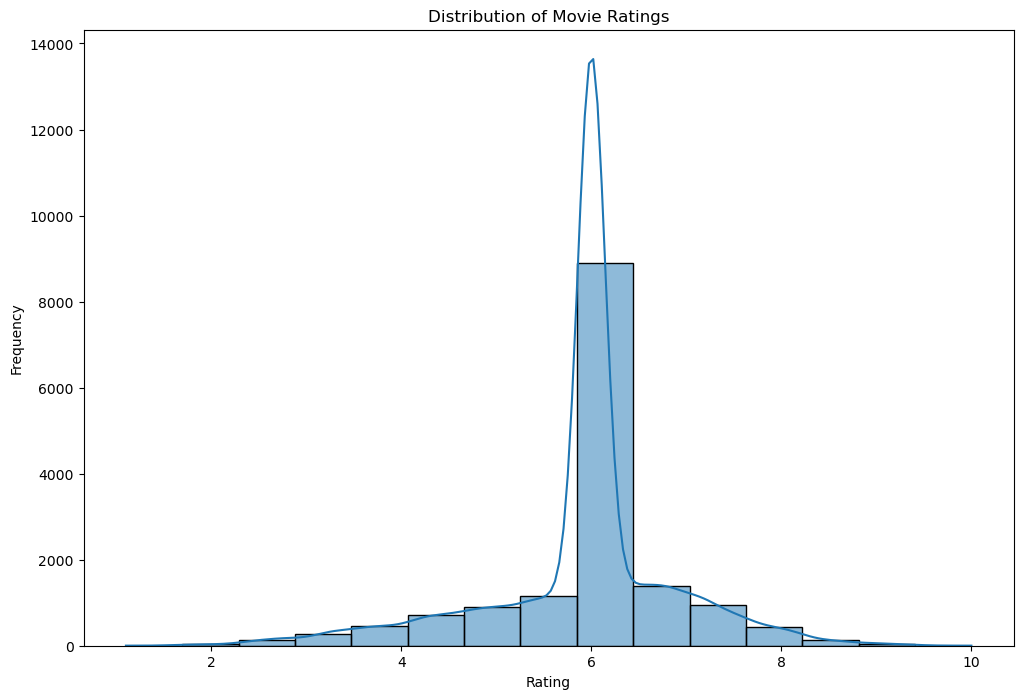

In [21]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 8))
sns.histplot(df['Rating'].dropna(), kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Rating')

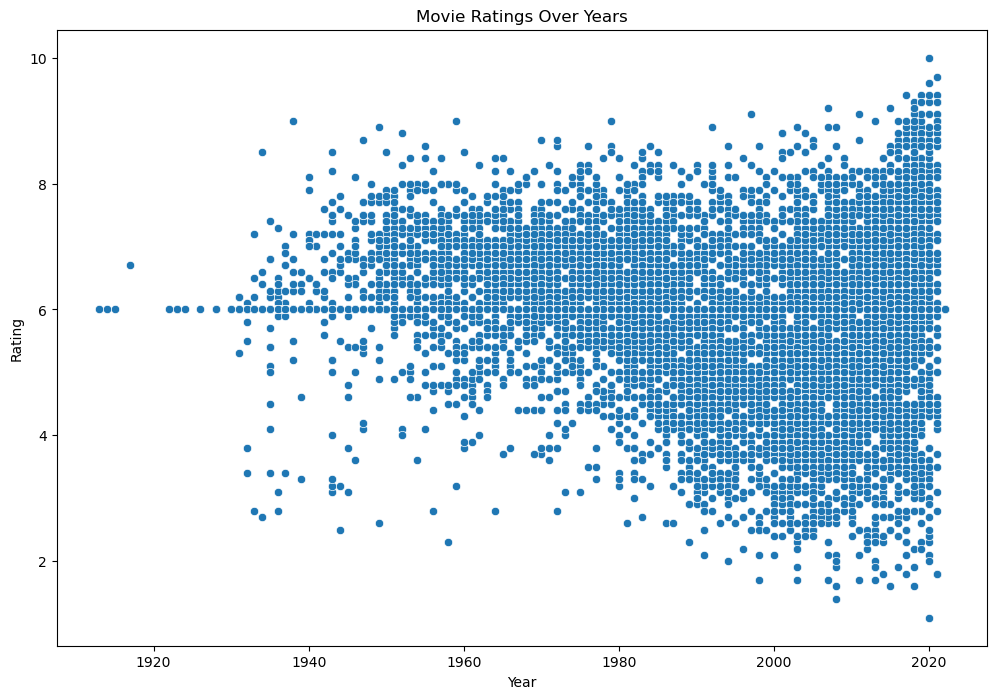

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Rating', data=df)
plt.title('Movie Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Rating')

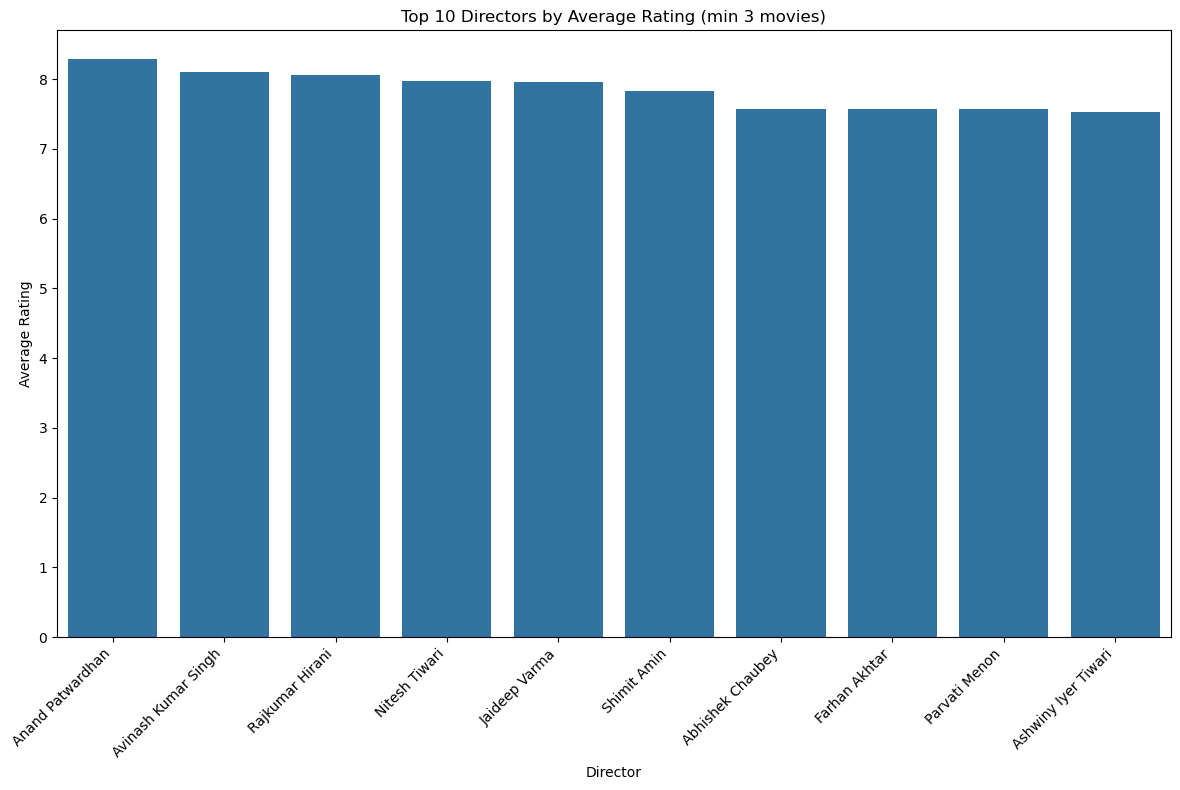

In [23]:
# Top 10 directors by average rating (with at least 3 movies)
director_ratings = df.groupby('Director')['Rating'].agg(['mean', 'count'])
top_directors = director_ratings[director_ratings['count'] >= 3].sort_values('mean', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.index, y=top_directors['mean'])
plt.title('Top 10 Directors by Average Rating (min 3 movies)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Rating')
plt.tight_layout()

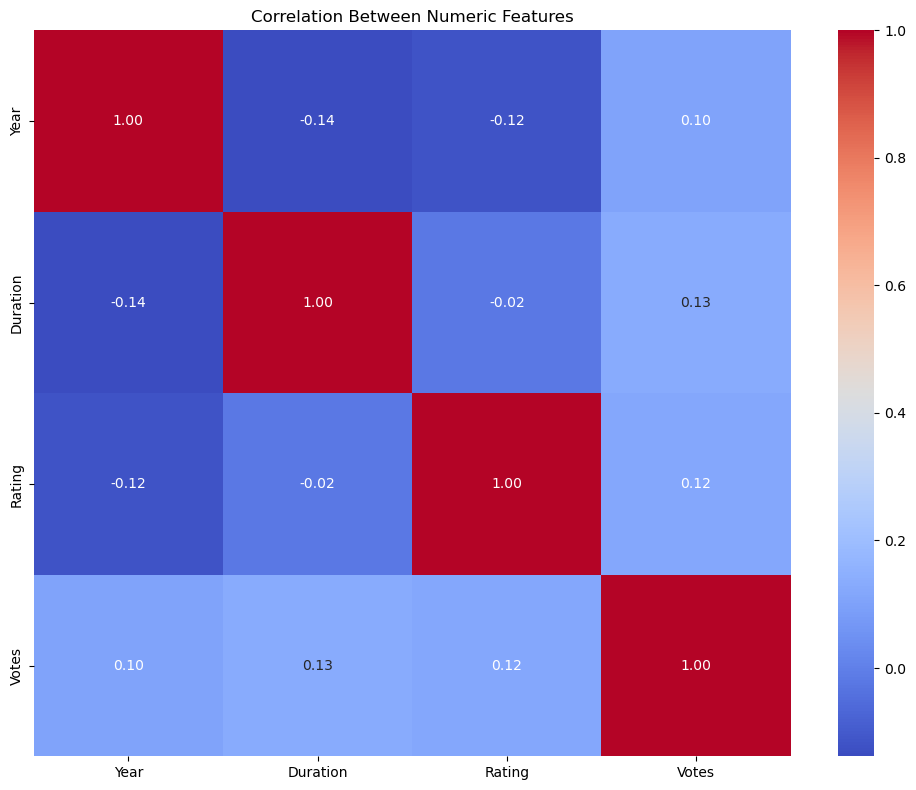

In [24]:
# Correlation between numeric features
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

In [25]:
# Create a new feature: Rating Category
df['Rating_Category'] = pd.cut(df['Rating'], 
                              bins=[0, 4, 6, 8, 10], 
                              labels=['Poor', 'Average', 'Good', 'Excellent'])

In [26]:
# Prepare data for modeling
# Select features and target
features = df.drop('Rating_Category', axis=1)
target = 'Rating_Category'

In [27]:
model_df = df[features.columns.tolist() + [target]].dropna().copy()

In [28]:
# Encode the target variable
for col in model_df.select_dtypes(include='object').columns:
    encoder = TargetEncoder()
    model_df[col + '_target_encoded'] = encoder.fit_transform(model_df[[col]], model_df['Rating'])
    model_df.drop(col, axis=1, inplace=True)

In [29]:
model_df.head()

,Year,Duration,Rating,Votes,Rating_Category,Name_target_encoded,Genre_target_encoded,Director_target_encoded,Actor 1_target_encoded,Actor 2_target_encoded,Actor 3_target_encoded
1,2019,109,7.0,8,Good,5.918910,6.092147,5.920016,6.700000,5.916483,5.923724
2,2021,90,6.0,8,Average,5.920121,6.310699,5.915071,6.434894,6.718851,5.915579
3,2019,110,4.4,35,Average,5.918910,5.753636,5.922442,5.686126,5.923619,4.500000
4,2010,105,6.0,8,Average,5.918111,6.079884,6.282032,6.819152,5.930410,5.600000
5,1997,147,4.7,827,Average,5.918910,6.167415,5.539091,5.231326,5.966969,5.851637


In [30]:
for col in df.columns:
    d=df[df[col].isnull()==True].index
    df.drop(d,inplace=True)

In [31]:
print(df.shape)
print(model_df.shape)

(15501, 11)
(15501, 11)


In [32]:
# Split the data into training and testing sets
X = model_df.drop('Rating_Category', axis=1)
y = model_df['Rating_Category']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [34]:
X_train.shape

(12400, 10)

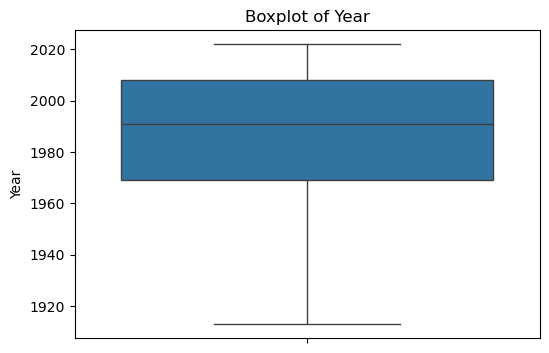

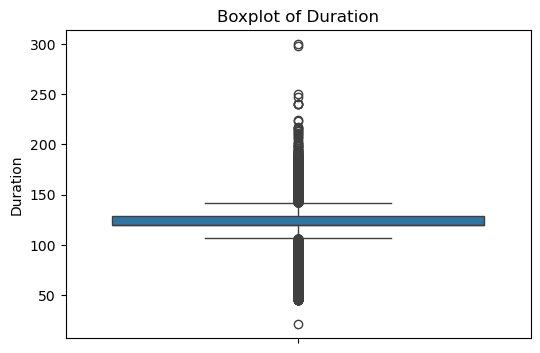

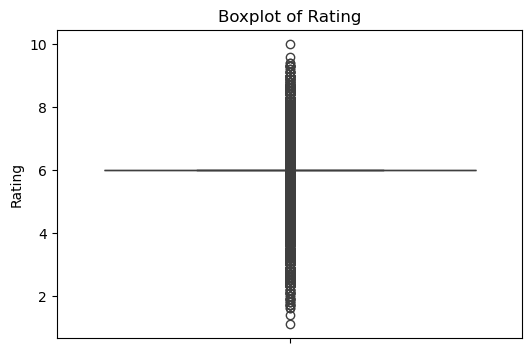

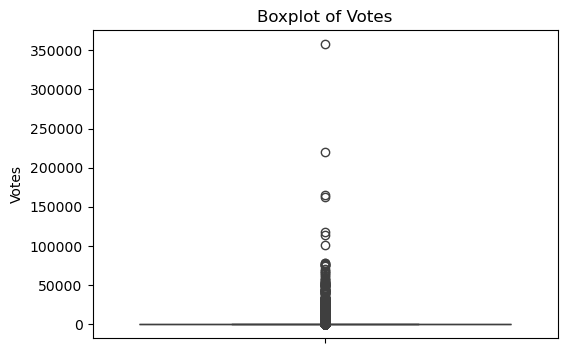

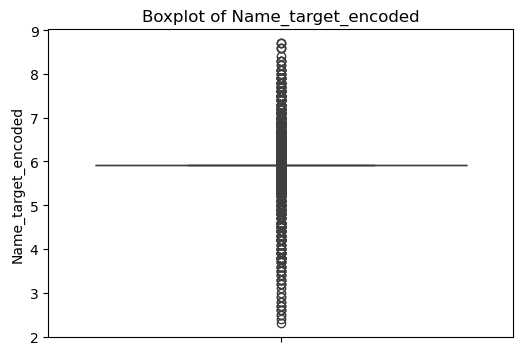

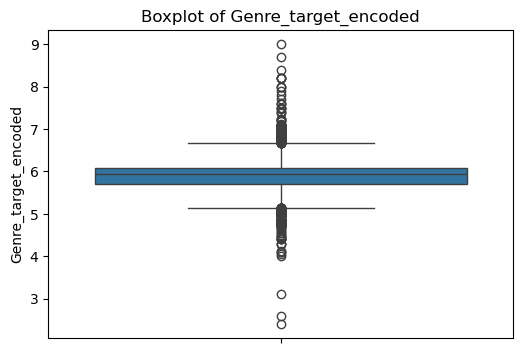

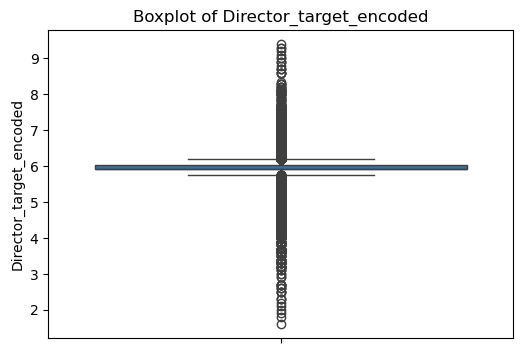

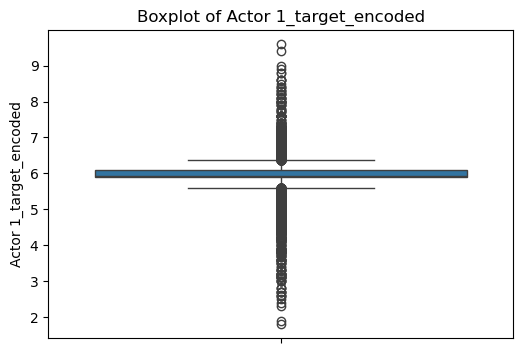

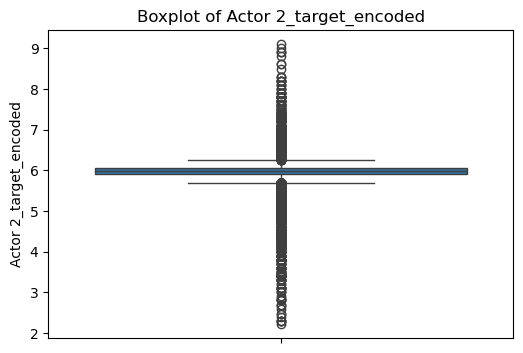

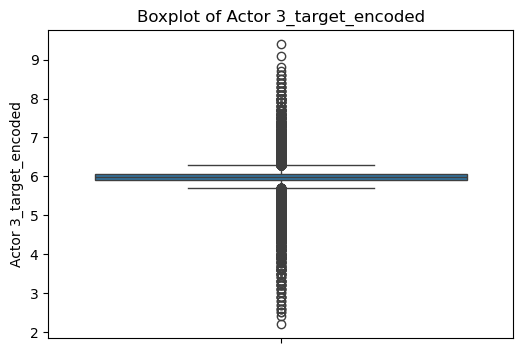

In [35]:
numeric_columns = X_train.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [36]:
# Outlier treatment on training data using capping method
for col in X_train.columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train[col] = np.where(X_train[col] < lower_bound, lower_bound, X_train[col])
    X_train[col] = np.where(X_train[col] > upper_bound, upper_bound, X_train[col])

In [37]:
X_train.shape

(12400, 10)

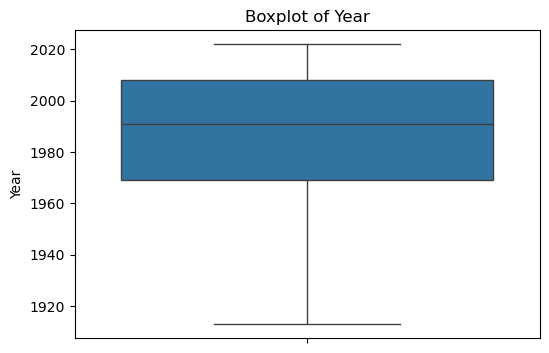

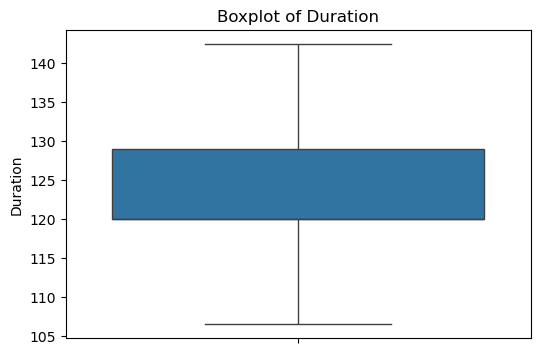

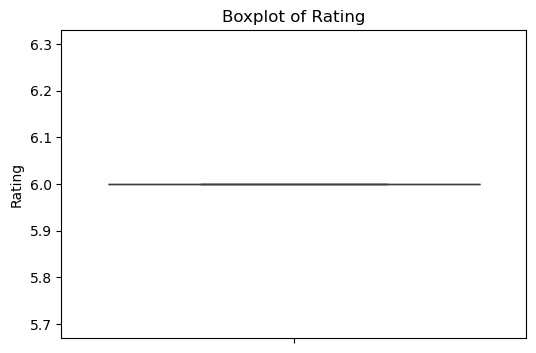

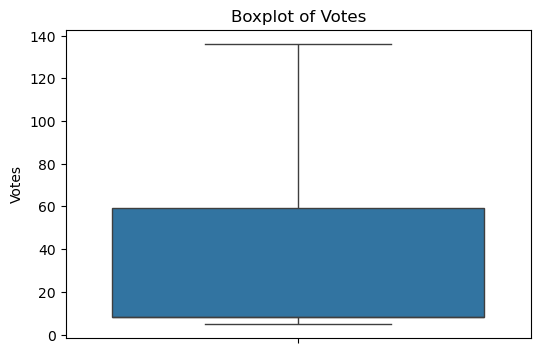

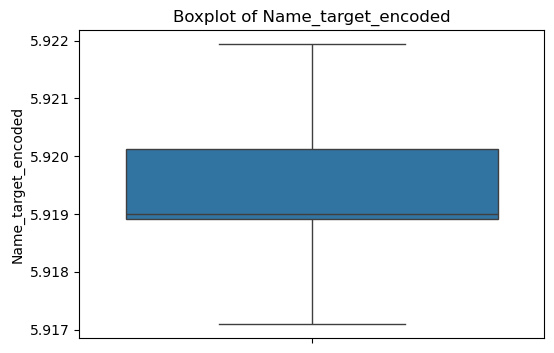

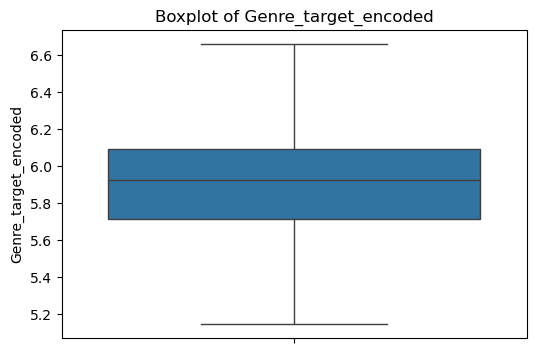

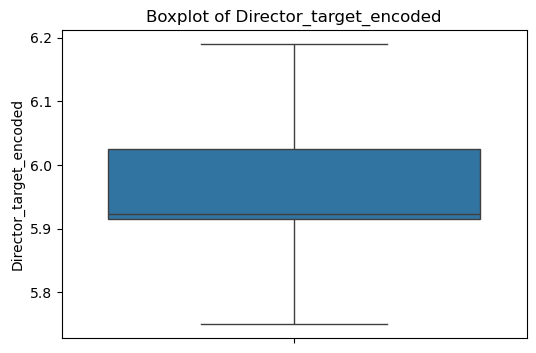

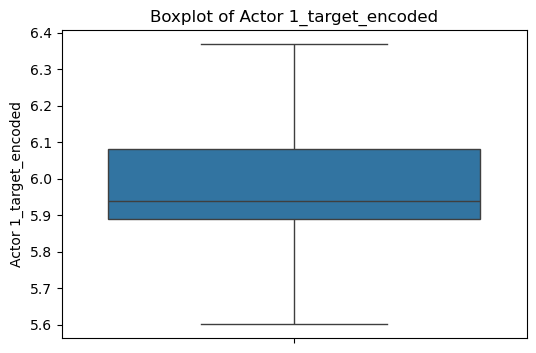

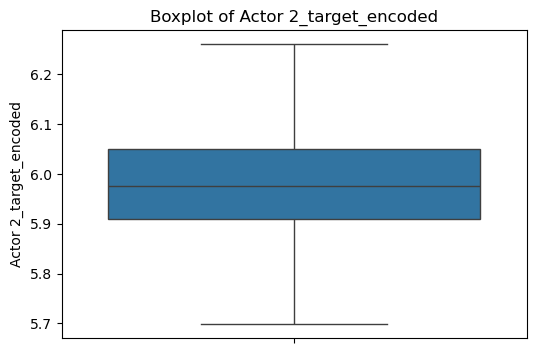

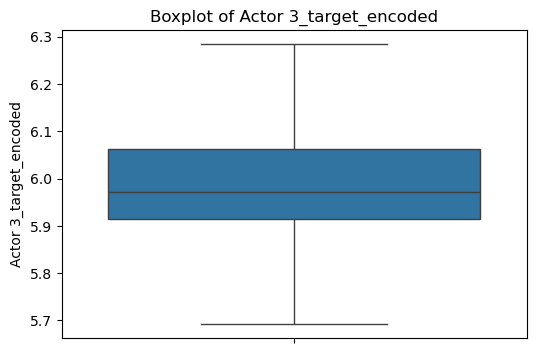

In [38]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [39]:
# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
              precision    recall  f1-score   support

     Average       0.80      0.86      0.83      2143
   Excellent       0.00      0.00      0.00        59
        Good       0.53      0.49      0.51       712
        Poor       0.40      0.33      0.36       187

    accuracy                           0.72      3101
   macro avg       0.43      0.42      0.43      3101
weighted avg       0.70      0.72      0.71      3101



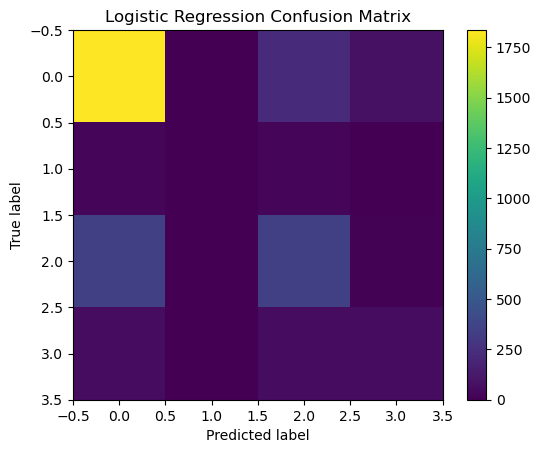

In [40]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure()
plt.imshow(cm_lr, interpolation='nearest')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
plt.show()

In [41]:
# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=50)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [42]:
# Report
print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))

=== Decision Tree ===
              precision    recall  f1-score   support

     Average       0.83      0.84      0.83      2143
   Excellent       0.12      0.15      0.14        59
        Good       0.57      0.56      0.57       712
        Poor       0.18      0.17      0.17       187

    accuracy                           0.72      3101
   macro avg       0.43      0.43      0.43      3101
weighted avg       0.72      0.72      0.72      3101



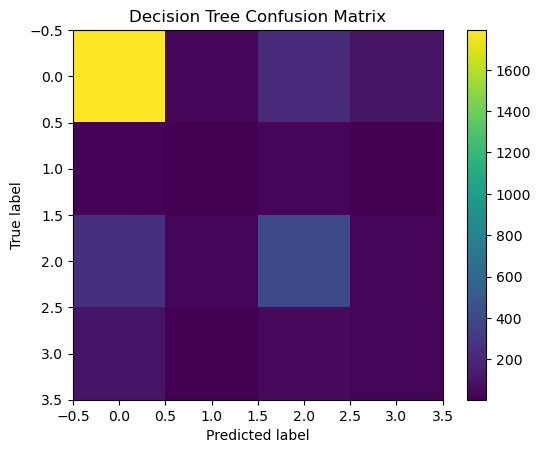

In [43]:
# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure()
plt.imshow(cm_dt, interpolation='nearest')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
plt.show()

In [44]:
# 3. Random Forest
rf = RandomForestClassifier(random_state=50)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [45]:
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
              precision    recall  f1-score   support

     Average       0.84      0.91      0.87      2143
   Excellent       0.33      0.02      0.03        59
        Good       0.64      0.69      0.66       712
        Poor       0.33      0.05      0.08       187

    accuracy                           0.79      3101
   macro avg       0.54      0.41      0.41      3101
weighted avg       0.75      0.79      0.76      3101



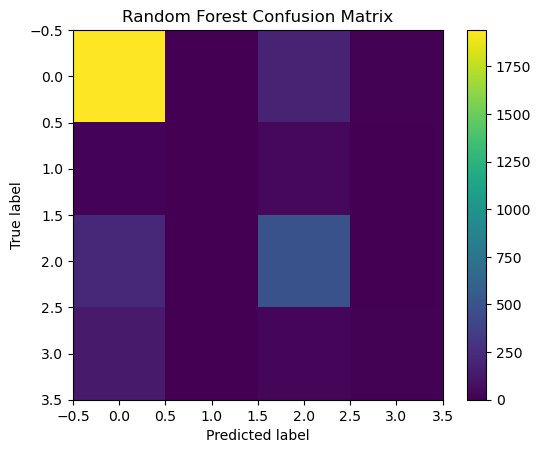

In [46]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
plt.imshow(cm_rf, interpolation='nearest')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
plt.show()

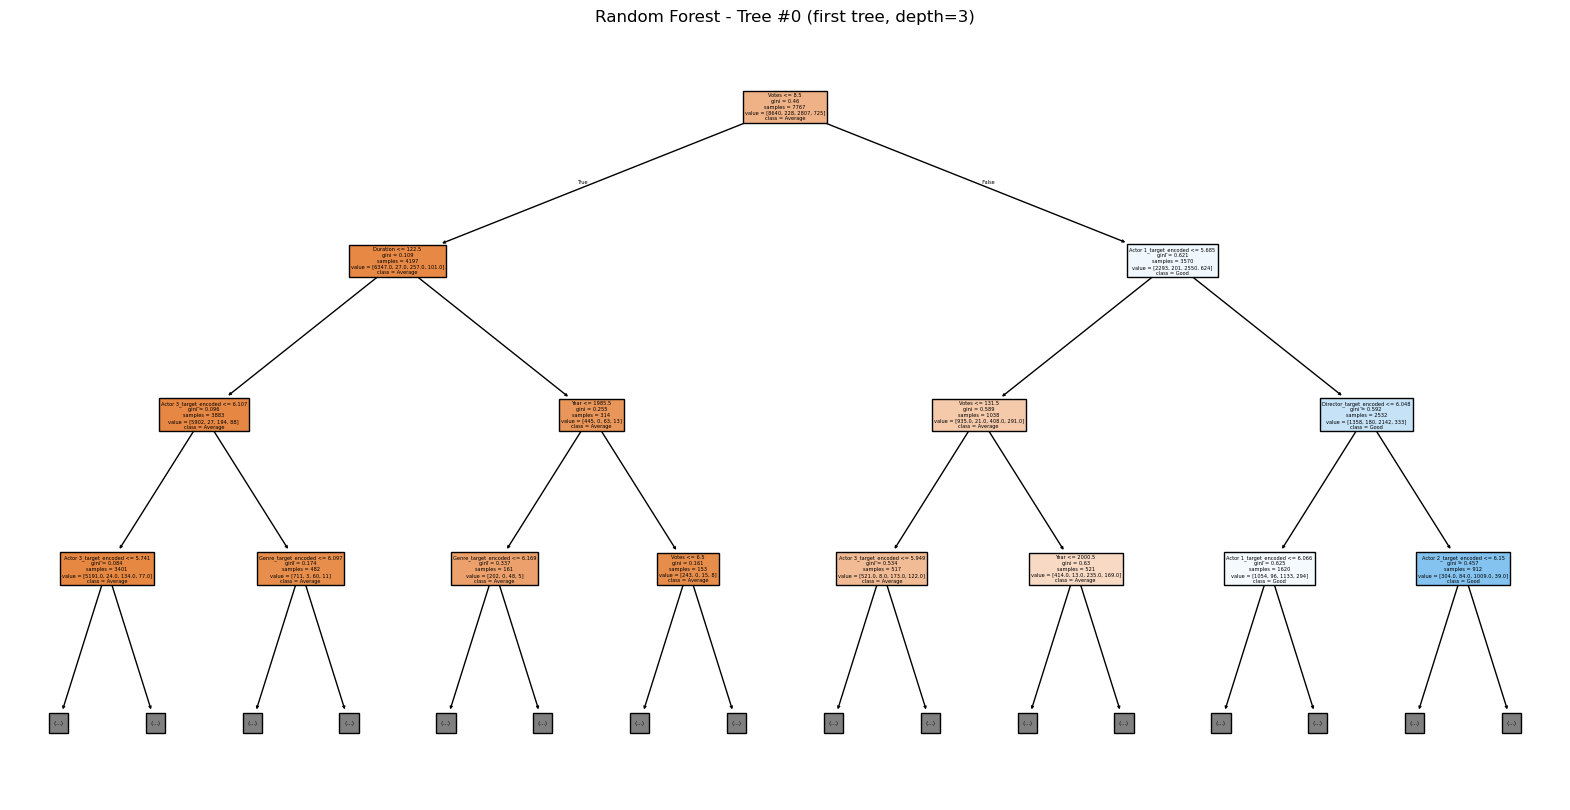

In [47]:
# Visualize one tree from the random forest (first estimator)
plt.figure(figsize=(20, 10))
plot_tree(
    rf.estimators_[0],
    feature_names=X_train.columns,
    class_names=[str(c) for c in rf.classes_],
    filled=True,
    max_depth=3
)
plt.title('Random Forest - Tree #0 (first tree, depth=3)')
plt.show()

In [48]:
# 4. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Train
gb = GradientBoostingClassifier(random_state=50)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [49]:
# Report
print("=== Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb))

=== Gradient Boosting ===
              precision    recall  f1-score   support

     Average       0.84      0.90      0.87      2143
   Excellent       0.40      0.03      0.06        59
        Good       0.65      0.70      0.67       712
        Poor       0.42      0.11      0.17       187

    accuracy                           0.79      3101
   macro avg       0.58      0.43      0.44      3101
weighted avg       0.77      0.79      0.77      3101



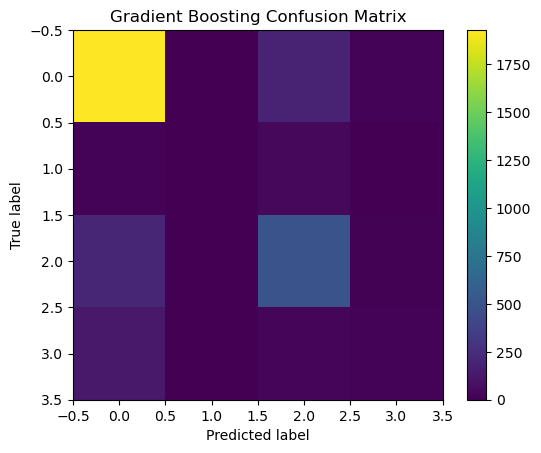

In [50]:
# Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure()
plt.imshow(cm_gb, interpolation='nearest')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar()
plt.show()

In [51]:
# Comparing models
results = [
    {'Model': 'Logistic Regression', 'Accuracy': accuracy_score(y_test, y_pred_lr), 'Macro F1': f1_score(y_test, y_pred_lr, average='macro')},
    {'Model': 'Decision Tree',         'Accuracy': accuracy_score(y_test, y_pred_dt), 'Macro F1': f1_score(y_test, y_pred_dt, average='macro')},
    {'Model': 'Random Forest',         'Accuracy': accuracy_score(y_test, y_pred_rf), 'Macro F1': f1_score(y_test, y_pred_rf, average='macro')},
    {'Model': 'Gradient Boosting',     'Accuracy': accuracy_score(y_test, y_pred_gb), 'Macro F1': f1_score(y_test, y_pred_gb, average='macro')}
]
results_df = pd.DataFrame(results).set_index('Model')
print("=== Model Comparison ===")
print(results_df)

=== Model Comparison ===
                     Accuracy  Macro F1
Model                                  
Logistic Regression  0.724605  0.425354
Decision Tree        0.719768  0.427623
Random Forest        0.786198  0.412827
Gradient Boosting    0.788778  0.444019


In [52]:
# Choosing best
best_model_acc = results_df['Accuracy'].idxmax()
best_accuracy = results_df.loc[best_model_acc, 'Accuracy']
print(f"Best model by Accuracy: {best_model_acc} (Accuracy = {best_accuracy:.2%})")

Best model by Accuracy: Gradient Boosting (Accuracy = 78.88%)
